In [1]:
# steps for portfolio optimization 
# Step 1: Collected adjusted closing prices for 70 stocks from 8 different sectors for 8 years
# Step 2: Compute percetange gain/loss w.r.t previous day
# Step 3: Collect data for features
# Step 3.1 --> Trading volume
# Step 3.2 --> Volatility Index (VIX)
# Step 3.3 --> 10-year Treasury Yield Index (TNX)
# Step 3.4 --> Oil Index (CL=F)
# Step 3.5 --> S&P Index (GSPC)
# Step 3.6 --> Global Income & Currency Fund (XGCFX)
# Step 3.7 --> Dow Jones Index (DJI)

# Step 4 --> Use 3 years of data to train and the following year's data as validation to
# get the best hyperparameters

# Step 5 (a little unclear) --> Model using the 4 years of data to build the final model


In [2]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import yfinance as yf
quandl.ApiConfig.api_key = "6yEusj8NAz6mkQLeVvpB"


In [3]:
# get top 70 companies ticker 
# Download S&P 500 company tickers
table=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df = table[0]
tickers = df['Symbol'].tolist()

In [120]:
start_date = '2014-1-1'
end_date = '2022-12-31'
top_70 = tickers[:71]
DYahoo = yf.download(" ".join(top_70), start=start_date,end=end_date)

[*********************100%***********************]  71 of 71 completed

1 Failed download:
- BRK.B: No timezone found, symbol may be delisted


In [121]:
DYahoo = DYahoo.drop(('Adj Close','BRK.B'),axis=1)
DYahoo = DYahoo.drop(('Volume','BRK.B'),axis=1)

In [123]:
# calculate percentage change for returns
DYahoo['Adj Close'] = DYahoo['Adj Close'].pct_change()
DYahoo.head()

Adj Close                                                    \
                   A       AAL       AAP      AAPL      ABBV       ABC   
Date                                                                     
2014-01-02       NaN       NaN       NaN       NaN       NaN       NaN   
2014-01-03  0.012631  0.046530  0.028613 -0.021966  0.006157  0.000716   
2014-01-06 -0.004919  0.018463 -0.009568  0.005453 -0.036520 -0.003575   
2014-01-07  0.014301 -0.004439  0.012344 -0.007152  0.001985  0.010906   
2014-01-08  0.016362  0.026756 -0.007775  0.006333 -0.002575  0.009795   

                                                    ...   Volume          \
                 ABT      ACGL       ACN      ADBE  ...      BKR     BLK   
Date                                                ...                    
2014-01-02       NaN       NaN       NaN       NaN  ...  3475200  396500   
2014-01-03  0.010724 -0.019174  0.003328 -0.002193  ...  3195400  442900   
2014-01-06  0.013199 -0.009419 -0.010565 -0.017579  ...  2940300  502400   
2014-01-07 -0.007663  0.000359  0.012168  0.014625  ...  4494200  422700   
2014-01-08  0.009009 -0.005918  0.007728 -0.001187  ...  5122500  689100   

                                                                        \
                 GOOG      GOOGL      LNT      MMM        MO         T   
Date                                                                     
2014-01-02   73129082   72783144  1103400  3052100   6324600  26784388   
2014-01-03   66917888   66601332   894400  2133300   5361400  32594629   
2014-01-06   71037271   70701228  1692600  2712100  10717600  27527946   
2014-01-07  102486711  102001896   923000  2525500   7042700  34060032   
2014-01-08   90036218   89610300  1417800  3122700  13396900  49975042   

                              
               TECH      WRB  
Date                          
2014-01-02  1356800  1105650  
2014-01-03   958000   801900  
2014-01-06  1344000  1002600  
2014-01-07  1262000  1298700  
2014-01-08   860800  2381625  

[5 rows x 424 columns]

In [124]:
oil_data = yf.download("CL=F",start=start_date,end=end_date)
oil_data = oil_data.rename(columns={'Close':'Oil_Index_Price'})
DYahoo = DYahoo.join(oil_data['Oil_Index_Price'])
DYahoo.head(2)

[*********************100%***********************]  1 of 1 completed


d:\Programming\Anaconda\lib\site-packages\pandas\core\frame.py:9130: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left,1 on the right)
  return merge(


,"(Adj Close, A)","(Adj Close, AAL)","(Adj Close, AAP)","(Adj Close, AAPL)","(Adj Close, ABBV)","(Adj Close, ABC)","(Adj Close, ABT)","(Adj Close, ACGL)","(Adj Close, ACN)","(Adj Close, ADBE)",...,"(Volume, BLK)","(Volume, GOOG)","(Volume, GOOGL)","(Volume, LNT)","(Volume, MMM)","(Volume, MO)","(Volume, T)","(Volume, TECH)","(Volume, WRB)",Oil_Index_Price
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,396500,73129082,72783144,1103400,3052100,6324600,26784388,1356800,1105650,95.440002
2014-01-03,0.012631,0.04653,0.028613,-0.021966,0.006157,0.000716,0.010724,-0.019174,0.003328,-0.002193,...,442900,66917888,66601332,894400,2133300,5361400,32594629,958000,801900,93.959999


In [125]:
treasury_data = yf.Ticker('^TNX').history(start=start_date,end=end_date)
treasury_data = treasury_data.rename(columns={'Close':'TNX_Price'})
treasury_data.index = treasury_data.index.tz_convert('US/Eastern').tz_localize(None)
DYahoo = DYahoo.join(treasury_data['TNX_Price'])
DYahoo.head(2)

,"(Adj Close, A)","(Adj Close, AAL)","(Adj Close, AAP)","(Adj Close, AAPL)","(Adj Close, ABBV)","(Adj Close, ABC)","(Adj Close, ABT)","(Adj Close, ACGL)","(Adj Close, ACN)","(Adj Close, ADBE)",...,"(Volume, GOOG)","(Volume, GOOGL)","(Volume, LNT)","(Volume, MMM)","(Volume, MO)","(Volume, T)","(Volume, TECH)","(Volume, WRB)",Oil_Index_Price,TNX_Price
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,73129082,72783144,1103400,3052100,6324600,26784388,1356800,1105650,95.440002,2.985
2014-01-03,0.012631,0.04653,0.028613,-0.021966,0.006157,0.000716,0.010724,-0.019174,0.003328,-0.002193,...,66917888,66601332,894400,2133300,5361400,32594629,958000,801900,93.959999,2.995


In [126]:
S_and_P = yf.Ticker('^GSPC').history(start=start_date,end=end_date)
S_and_P.index = S_and_P.index.tz_convert('US/Eastern').tz_localize(None)
DYahoo['S&P_Price'] = S_and_P['Close']
DYahoo.head(2)

,"(Adj Close, A)","(Adj Close, AAL)","(Adj Close, AAP)","(Adj Close, AAPL)","(Adj Close, ABBV)","(Adj Close, ABC)","(Adj Close, ABT)","(Adj Close, ACGL)","(Adj Close, ACN)","(Adj Close, ADBE)",...,"(Volume, GOOGL)","(Volume, LNT)","(Volume, MMM)","(Volume, MO)","(Volume, T)","(Volume, TECH)","(Volume, WRB)",Oil_Index_Price,TNX_Price,S&P_Price
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,72783144,1103400,3052100,6324600,26784388,1356800,1105650,95.440002,2.985,1831.979980
2014-01-03,0.012631,0.04653,0.028613,-0.021966,0.006157,0.000716,0.010724,-0.019174,0.003328,-0.002193,...,66601332,894400,2133300,5361400,32594629,958000,801900,93.959999,2.995,1831.369995


In [127]:
DowJones = yf.Ticker('DJI').history(start=start_date,end=end_date)
DowJones.index = DowJones.index.tz_convert('US/Eastern').tz_localize(None)
DYahoo['DJI_Price'] = DowJones['Close']
DYahoo.head(2)

,"(Adj Close, A)","(Adj Close, AAL)","(Adj Close, AAP)","(Adj Close, AAPL)","(Adj Close, ABBV)","(Adj Close, ABC)","(Adj Close, ABT)","(Adj Close, ACGL)","(Adj Close, ACN)","(Adj Close, ADBE)",...,"(Volume, LNT)","(Volume, MMM)","(Volume, MO)","(Volume, T)","(Volume, TECH)","(Volume, WRB)",Oil_Index_Price,TNX_Price,S&P_Price,DJI_Price
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1103400,3052100,6324600,26784388,1356800,1105650,95.440002,2.985,1831.979980,16441.300781
2014-01-03,0.012631,0.04653,0.028613,-0.021966,0.006157,0.000716,0.010724,-0.019174,0.003328,-0.002193,...,894400,2133300,5361400,32594629,958000,801900,93.959999,2.995,1831.369995,16470.000000


In [128]:
VolIndex = yf.Ticker('^VIX').history(start=start_date,end=end_date)
VolIndex.index = VolIndex.index.tz_convert('US/Eastern').tz_localize(None)
DYahoo['VIX_Price'] = VolIndex['Close']
DYahoo.head(2)

,"(Adj Close, A)","(Adj Close, AAL)","(Adj Close, AAP)","(Adj Close, AAPL)","(Adj Close, ABBV)","(Adj Close, ABC)","(Adj Close, ABT)","(Adj Close, ACGL)","(Adj Close, ACN)","(Adj Close, ADBE)",...,"(Volume, MMM)","(Volume, MO)","(Volume, T)","(Volume, TECH)","(Volume, WRB)",Oil_Index_Price,TNX_Price,S&P_Price,DJI_Price,VIX_Price
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3052100,6324600,26784388,1356800,1105650,95.440002,2.985,1831.979980,16441.300781,14.23
2014-01-03,0.012631,0.04653,0.028613,-0.021966,0.006157,0.000716,0.010724,-0.019174,0.003328,-0.002193,...,2133300,5361400,32594629,958000,801900,93.959999,2.995,1831.369995,16470.000000,13.76


In [94]:
def use_quandl():
    selected = []
    data = pd.DataFrame()
    start_date = '2014-1-1'
    end_date = '2022-12-31'
    count = 0
    for tick in tickers:
        if count == 70: break
        temp_data = quandl.get_table('WIKI/PRICES', ticker = tick,
                            qopts = { 'columns': ['date', 'ticker', 'adj_close','volume','VIX'] },
                            date = { 'gte': start_date, 'lte':  end_date}, paginate=True)
        if len(temp_data) != 0:
            data = pd.concat([data,temp_data],axis=0)
            count += 1
            selected.append(tick)
    assert(data['ticker'].nunique() == 70)
    assert(len(selected) == 70)

In [85]:
# reorganise data pulled by setting date as index with
# columns of tickers and their corresponding adjusted prices
# clean = data.set_index('date')
# table = clean.pivot(columns='ticker')


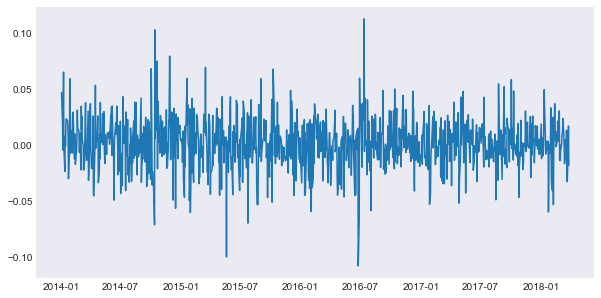

In [87]:
# calculate daily and annual returns of the stocks
#returns_daily = table.pct_change() # pct_change calculates the percentage change from the previous val (hence the first row is just Nan cus there is no element before that to compare to)

In [89]:
returns_annual = returns_daily.mean() * 250

In [ ]:
# get daily and covariance of returns of the stock
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250

# empty lists to store returns, volatility and weights of portfolios
port_returns = []
port_volatility = []
sharpe_ratio = []
stock_weights = []

# set the number of combinations for imaginary portfolios
num_assets = len(selected)
num_portfolios = 50000

#set random seed for reproduction's sake
np.random.seed(101)


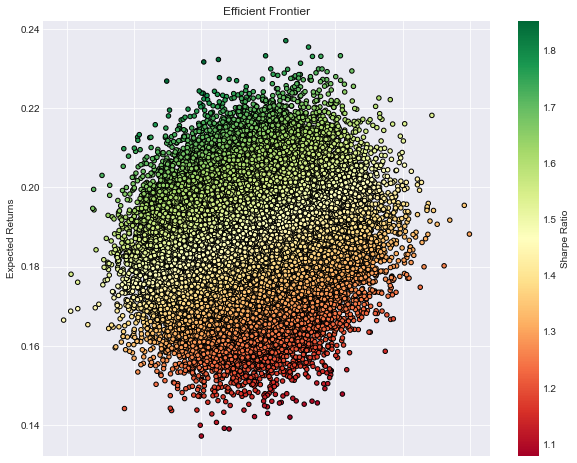

In [48]:
# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    # randomly assigning weights to different portfolios
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)

    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    sharpe = returns / volatility

    sharpe_ratio.append(sharpe)
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility,
             'Sharpe Ratio': sharpe_ratio}

# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(selected):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' Weight' for stock in selected]

# reorder dataframe columns
df = df[column_order]

# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()